#COMP0188 Lab4B

In this lab we will use Baseline Recurrent Neural Network (RNN) model for timeseries data of sunspots with data analysis, visualisation, model definition, training the RNN model and evaluate using Mean square error on the predicted data.


In [ ]:
# Set up of the environment

In [1]:
!pip install tensorflow
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import os


Use the data on moodle and try to perform data analysis of Sunspots data and do the boxplot of Sunspots by year.



In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

# Keep the dataframe unchanged for SIMPLE RNN Model
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/sunspots_01.csv')
print(df.tail(5))

# Copy df to test_df
## To use the grouping by month and year Datetime conversion method is quiet helpful
test_df = df.copy()
test_df['datetime'] = pd.to_datetime(test_df['Month'])
print(test_df.dtypes)
print(test_df.tail(5))
print(test_df.shape)
print(df.shape)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
        Month  Sunspots
2815  1983-08      71.8
2816  1983-09      50.3
2817  1983-10      55.8
2818  1983-11      33.3
2819  1983-12      33.4
Month               object
Sunspots           float64
datetime    datetime64[ns]
dtype: object
        Month  Sunspots   datetime
2815  1983-08      71.8 1983-08-01
2816  1983-09      50.3 1983-09-01
2817  1983-10      55.8 1983-10-01
2818  1983-11      33.3 1983-11-01
2819  1983-12      33.4 1983-12-01
(2820, 3)
(2820, 2)


#Subset dataset for easier visualisation and understand the data

      Month  Sunspots
1   1749-02      62.6
2   1749-03      70.0
3   1749-04      55.7
4   1749-05      85.0
5   1749-06      83.5
6   1749-07      94.8
7   1749-08      66.3
8   1749-09      75.9
9   1749-10      75.5
10  1749-11     158.6
11  1749-12      85.2
12  1750-01      73.3
13  1750-02      75.9
14  1750-03      89.2
15  1750-04      88.3
16  1750-05      90.0
17  1750-06     100.0
18  1750-07      85.4
19  1750-08     103.0
20  1750-09      91.2
21  1750-10      65.7
22  1750-11      63.3
23  1750-12      75.4
24  1751-01      70.0
25  1751-02      43.5
26  1751-03      45.3
27  1751-04      56.4
28  1751-05      60.7
29  1751-06      50.7
30  1751-07      66.3
31  1751-08      59.8
32  1751-09      23.5
33  1751-10      23.2
34  1751-11      28.5
35  1751-12      44.0
36  1752-01      35.0
37  1752-02      50.0
38  1752-03      71.0
39  1752-04      59.3
40  1752-05      59.7
41  1752-06      39.6
42  1752-07      78.4
43  1752-08      29.3
44  1752-09      27.1
45  1752-1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


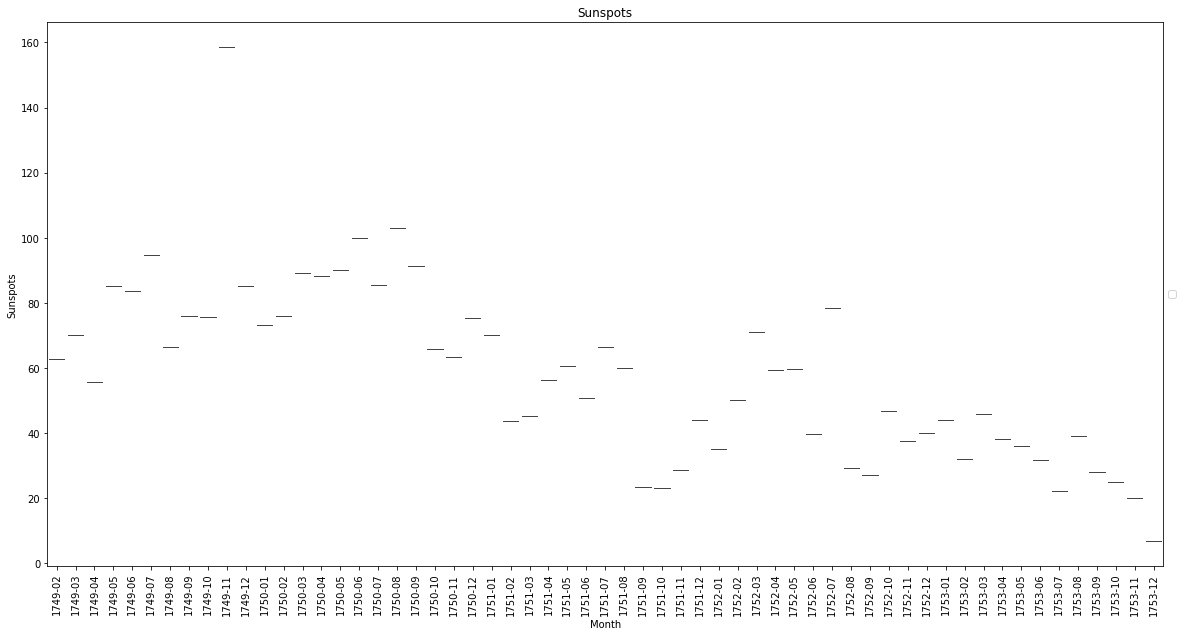

In [14]:
# Subset into a smaller dataframe for visualisation

# df has all datapoints.
df_sub=df[1:60]
print(df_sub)
print(df_sub.shape)

# Convert month to datatime format of pandas so grouping by year and month is easier
df_sub['datetime'] = pd.to_datetime(df_sub['Month'])
print(df_sub.dtypes)


#Visualise subset of the dataframe
xlabels = df_sub['Month']
fig, ax = plt.subplots(figsize=(20,10))
ax=sns.boxplot(x='Month', y='Sunspots', data=df_sub,linewidth=1)
ax.set_title('Sunspots')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xticklabels(xlabels, rotation=90)
plt.show()



In [15]:
#grouping by year
print(df_sub.dtypes)


df_sub['year'] = df_sub['datetime'].dt.year
print(df_sub)


df_sub.groupby('year')['Sunspots'].mean()


Month               object
Sunspots           float64
datetime    datetime64[ns]
dtype: object
      Month  Sunspots   datetime  year
1   1749-02      62.6 1749-02-01  1749
2   1749-03      70.0 1749-03-01  1749
3   1749-04      55.7 1749-04-01  1749
4   1749-05      85.0 1749-05-01  1749
5   1749-06      83.5 1749-06-01  1749
6   1749-07      94.8 1749-07-01  1749
7   1749-08      66.3 1749-08-01  1749
8   1749-09      75.9 1749-09-01  1749
9   1749-10      75.5 1749-10-01  1749
10  1749-11     158.6 1749-11-01  1749
11  1749-12      85.2 1749-12-01  1749
12  1750-01      73.3 1750-01-01  1750
13  1750-02      75.9 1750-02-01  1750
14  1750-03      89.2 1750-03-01  1750
15  1750-04      88.3 1750-04-01  1750
16  1750-05      90.0 1750-05-01  1750
17  1750-06     100.0 1750-06-01  1750
18  1750-07      85.4 1750-07-01  1750
19  1750-08     103.0 1750-08-01  1750
20  1750-09      91.2 1750-09-01  1750
21  1750-10      65.7 1750-10-01  1750
22  1750-11      63.3 1750-11-01  1750
23  1750

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


year
1749    83.009091
1750    83.391667
1751    47.658333
1752    47.800000
1753    30.691667
Name: Sunspots, dtype: float64

# To do (Simple Task)
For every year compute the average value of sunspots and sort the values of sunspots by year This will let you know which year the sunspots was minimum and maximum respectively

In [ ]:
## Enter your code here

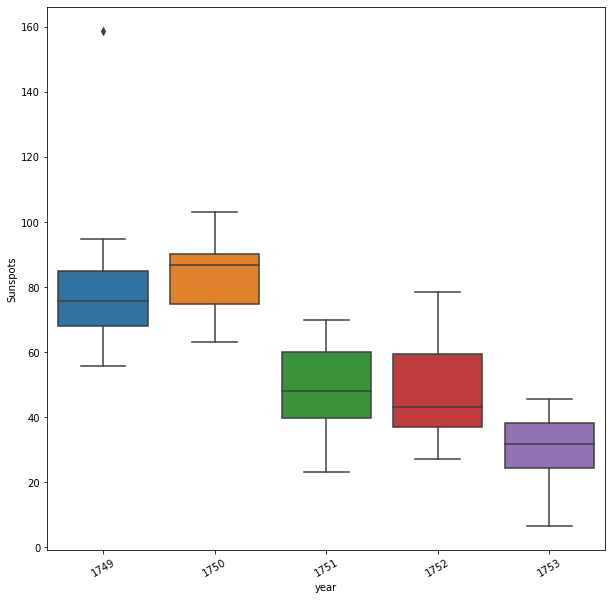

In [23]:
# Visualisation of data as boxplot
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.boxplot(data = df_sub, x='year',y=('Sunspots'))
for item in ax.get_xticklabels():
    item.set_rotation(30)

In [26]:
# Grouping by month
# Allows without saving extra month column
df_sub.groupby(df_sub['datetime'].dt.month)['Sunspots'].mean().sort_values()





datetime
10    47.200
9     49.140
12    50.260
2     52.800
1     55.575
8     59.480
4     59.540
6     61.100
11    61.600
3     64.240
5     66.280
7     69.420
Name: Sunspots, dtype: float64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


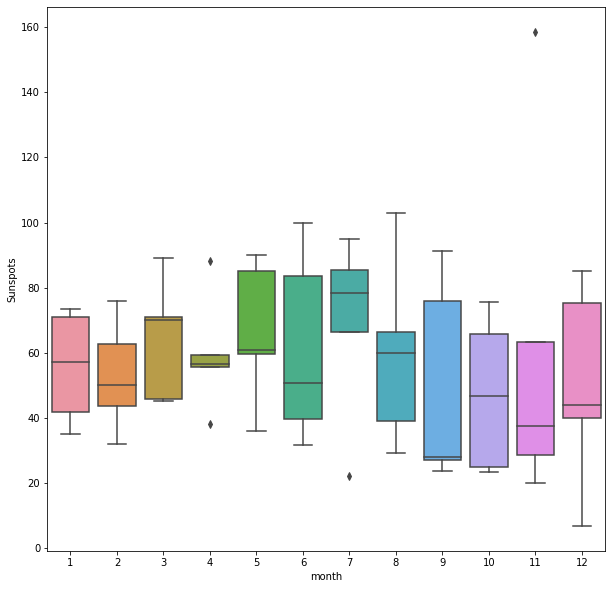

In [32]:
# Saving month column for plotting
df_sub['month'] = df_sub['datetime'].dt.month
#print(df_sub)


df_sub.groupby('month')['Sunspots'].mean()

# Visualisation of data as boxplot
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.boxplot(data = df_sub, x='month',y=('Sunspots'))
for item in ax.get_xticklabels():
    item.set_rotation(0)

In [ ]:
#Plot the above with custom defined fonts

#Task 1
Visualisation task

1. Subset the 1000 data points.
2. Try to use the plot by year to the new subset of data
3. Try to use the plot by month to the new subset of data
4. Write your inference about which year was minimum and maximum sunspot occurred?
5. Write your inference about which month was minimum and maximum sunspot occurred?

# 1. Simple RNN for time series dataset

Steps                                             
Data needs to be organized in the dataframe                     
Split the data into train and test features

In [17]:
import math

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [18]:
#Parameter split_percent defines the ratio of training examples
def get_train_test(data, split_percent=0.8):
  scaler = MinMaxScaler(feature_range=(0, 1))
  n = len(data)
  # Point for splitting data into train and test
  split = int(n*split_percent)
  train_data = data[range(split)]
  test_data = data[split:]
  return train_data, test_data, data

df_RNN = df.copy()
data = np.array(df_RNN['Sunspots'].values.astype('float32'))
print(data.dtype)

train_data, test_data, all_data = get_train_test(data)

print(train_data.shape)
print(test_data.shape)
print(all_data.shape)

float32
(2256,)
(564,)
(2820,)


#2. Generic way to define the RNN model

In [19]:
def create_RNN(hidden_units, dense_units, input_shape, activation):
  model = Sequential()
  model.add(SimpleRNN(hidden_units, input_shape=input_shape,
                      activation=activation[0]))
  model.add(Dense(units=dense_units, activation=activation[1]))
  model.compile(loss='mean_squared_error', optimizer='adam')
  return model

#3. Reshape data suitable for RNN input

In [20]:
# Prepare the input X and target Y
def get_XY(data, time_steps):
  # Indices of target array
  Y_ind = np.arange(time_steps, len(data), time_steps)
  Y = data[Y_ind]
  # Prepare X
  rows_x = len(Y)
  X = data[range(time_steps*rows_x)]
  X = np.reshape(X, (rows_x, time_steps, 1))
  return X, Y

time_steps = 12
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

print(trainX.shape)
print(trainY.shape)

(187, 12, 1)
(187,)


#4. Start RNN model training

In [21]:
model = create_RNN(hidden_units=3, dense_units=1, input_shape=(time_steps,1),
activation=['linear', 'tanh'])
model.fit(trainX, trainY, epochs=50, batch_size=1, verbose=1)

Epoch 1/50
187/187 [==============================] - 1s 2ms/step - loss: 3253.9358
Epoch 2/50
187/187 [==============================] - 0s 3ms/step - loss: 3253.9348
Epoch 3/50
187/187 [==============================] - 0s 2ms/step - loss: 3253.9351
Epoch 4/50
187/187 [==============================] - 0s 3ms/step - loss: 3253.9368
Epoch 5/50
187/187 [==============================] - 0s 2ms/step - loss: 3253.9346
Epoch 6/50
187/187 [==============================] - 0s 2ms/step - loss: 3253.9346
Epoch 7/50
187/187 [==============================] - 0s 2ms/step - loss: 3253.9348
Epoch 8/50
187/187 [==============================] - 0s 2ms/step - loss: 3253.9346
Epoch 9/50
187/187 [==============================] - 0s 2ms/step - loss: 3253.9348
Epoch 10/50
187/187 [==============================] - 0s 2ms/step - loss: 3253.9363
Epoch 11/50
187/187 [==============================] - 0s 2ms/step - loss: 3253.9355
Epoch 12/50
187/187 [==============================] - 0s 2ms/step - loss:

#4. Evaluate with Root Mean Square Error

In [22]:
def print_error(trainY, testY, train_predict, test_predict):
  # Error of predictions
  train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
  test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
  # Print RMSE
  print('Train RMSE: %.3f RMSE' % (train_rmse))
  print('Test RMSE: %.3f RMSE' % (test_rmse))
 

# make predictions
train_predict = model.predict(trainX)
test_predict = model.predict(testX)

# Mean square error
print_error(trainY, testY, train_predict, test_predict)

2/2 [==============================] - 0s 7ms/step
Train RMSE: 57.043 RMSE
Test RMSE: 92.189 RMSE


# Task 2:

1. Try to use 5 hidden units to the baseline RNN and estimate the RMSE.
2. Try to use tanh activation in all branch and estimate the RMSE.
3. Compare performance of tanh activation and linear activation with respect to the sunspot data